# Newton method implemented in Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from numpy.linalg import inv

## Set-up
To find the minimum of $100(x_1^2 - x_2)^2 + (x_1 - 1)^2$

C:\Users\maoja\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


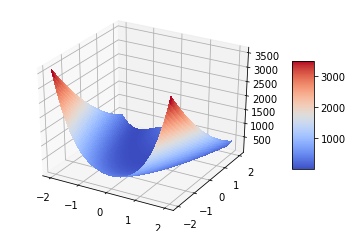

In [2]:
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
x, y = np.meshgrid(x, y)
z = 100 * np.square(x*x - y) + np.square(x - 1)
fig = plt.figure()
ax = fig.gca(projection = '3d')
surf = ax.plot_surface(x, y, z, rstride = 1, cstride = 1, cmap = cm.coolwarm, linewidth = \
                      0, antialiased = False)
fig.colorbar(surf, shrink = 0.5, aspect = 5)
fig.show()

## Newton method

In [3]:
def func(x):
    return 100*np.square(x[0]*x[0] - x[1]) + np.square(x[0] - 1)


# First-order derivatives of the function
def dfunc(x):
    df1 = 400*x[0]*(x[0]*x[0] - x[1]) + 2*(x[0] - 1)
    df2 = -200*(x[0]*x[0] - x[1])
    return np.array([df1, df2])


def invhess(x):
    df11 = 1200*x[0]*x[0] - 400*x[1] + 2
    df12 = -400*x[0]
    df21 = -400*x[0]
    df22 = 200
    hess = np.array([[df11, df12], [df21, df22]])
    return inv(hess)


def newton(x, max_int):
    miter = 1
    step = .5
    vals = []
    objectfs = []
    while miter <= max_int:
        vals.append(x)
        objectfs.append(func(x))
        temp = x - step*(invhess(x).dot(dfunc(x)))
        if np.abs(func(temp) - func(x)) > 0.0001:
            x = temp
        else:
            break
        print(x, func(x), miter)
        miter += 1
    return vals, objectfs, miter

## Testing

[ 4.99950012 14.99500125] 10015.996500999732 1
[ 4.99850075 19.98500862] 2515.989131933627 2
[ 4.9965035  22.46504264] 640.9743156346779 3
[ 4.99251498 23.67518762] 172.19472181001353 4
[ 4.98456188 24.22078475] 54.9482768273587 5
[ 4.96875194 24.37570969] 25.534508005533738 6
[ 4.93753006 24.22183522] 17.980607577859825 7
[ 4.87690338 23.70182702] 15.708688997277749 8
[ 4.7659566  22.66085333] 14.468535895722841 9
[ 4.60498788 21.153258  ] 13.273196783902044 10
[ 4.44867175 19.7399179 ] 12.151019317491105 11
[ 4.29405728 18.38964106] 11.093732736283604 12
[ 4.14236045 17.11149476] 10.101532481072494 13
[ 3.99316572 15.89928575] 9.171439844130498 14
[ 3.84669105 14.7525338 ] 8.301658919062687 15
[ 3.70291355 13.6686477 ] 7.4899634874303 16
[ 3.56190493 12.64582277] 6.734289227351646 17
[ 3.42370436 11.6819802 ] 6.0325191095435695 18
[ 3.28836654 10.77515251] 5.382560838831793 19
[3.1559441  9.92334647] 4.782319830836367 20
[3.02649439 9.12459271] 4.229709167267723 21
[2.90007737 8.3769

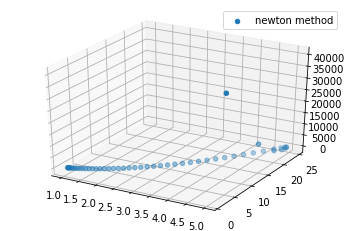

In [4]:
start = [5, 5]
val, objectf, iters = newton(start, 100)

x = np.array([i[0] for i in val])
y = np.array([i[1] for i in val])
z = np.array(objectf)
fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.scatter(x, y, z, label = 'newton method')
ax.legend()
plt.show()